In [652]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime


# Load Dataset
df = pd.read_csv('Olympics_Medallists_2024.csv')  # Update with your actual dataset path

# Display the first few rows of the dataset
df.head()


,medal_date,medal_type,medal_code,name,gender,country_code,country,country_long,nationality_code,nationality,...,team,team_gender,discipline,event,event_type,url_event,birth_date,code_athlete,code_team,is_medallist
0,7/27/2024,Gold Medal,1.0,EVENEPOEL Remco,Male,BEL,Belgium,Belgium,BEL,Belgium,...,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1/25/2000,1903136,NaN,True
1,7/27/2024,Silver Medal,2.0,GANNA Filippo,Male,ITA,Italy,Italy,ITA,Italy,...,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,7/25/1996,1923520,NaN,True
2,7/27/2024,Bronze Medal,3.0,van AERT Wout,Male,BEL,Belgium,Belgium,BEL,Belgium,...,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,9/15/1994,1903147,NaN,True
3,7/27/2024,Gold Medal,1.0,BROWN Grace,Female,AUS,Australia,Australia,AUS,Australia,...,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,7/7/1992,1940173,NaN,True
4,7/27/2024,Silver Medal,2.0,HENDERSON Anna,Female,GBR,Great Britain,Great Britain,GBR,Great Britain,...,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,11/14/1998,1912525,NaN,True


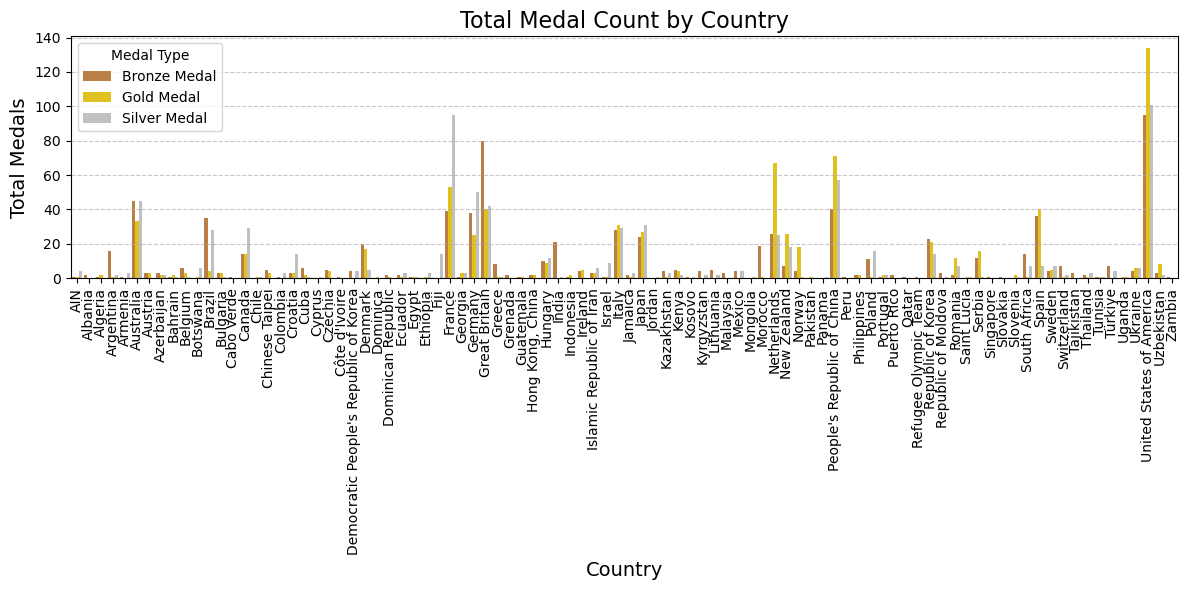

In [710]:
# Bar Plot: Total Medal Count by Country with Hue for Medal Type
plt.figure(figsize=(12, 6))

# Group the data by country and medal type, counting the occurrences
medal_counts = df.groupby(['country_long', 'medal_type']).size().reset_index(name='count')

# Create a custom color palette for the medal types
custom_palette = {
    'Gold Medal': '#FFD700',  # Gold color
    'Silver Medal': '#C0C0C0',  # Silver color
    'Bronze Medal': '#CD7F32'   # Bronze color
}

# Create the bar plot with the custom palette
sns.barplot(data=medal_counts, 
            x='country_long', 
            y='count', 
            hue='medal_type', 
            palette=custom_palette)

plt.title('Total Medal Count by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Medals', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(title='Medal Type')  # Optional: Add a legend title
plt.show()


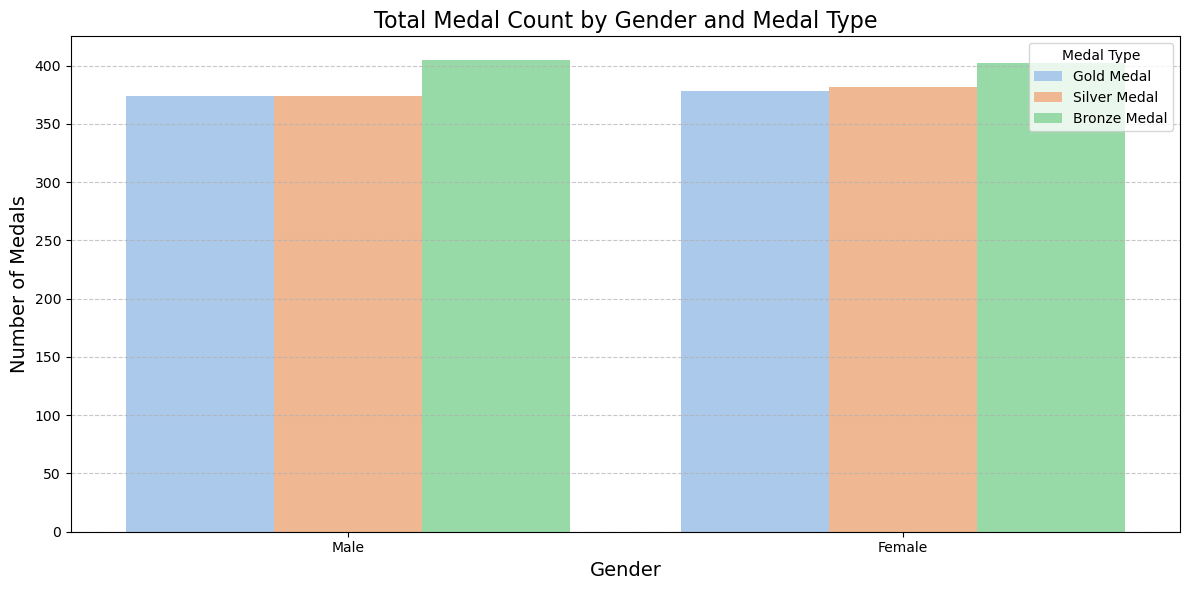

In [714]:
# Bar Plot: Total Medal Count by Gender and Medal Type
plt.figure(figsize=(12, 6))

# Use countplot with hue to differentiate medal types by gender
sns.countplot(x='gender', data=df, palette='pastel', hue='medal_type')

plt.title('Total Medal Count by Gender and Medal Type', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Medals', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(title='Medal Type')  # Optional: Add a legend title
plt.show()


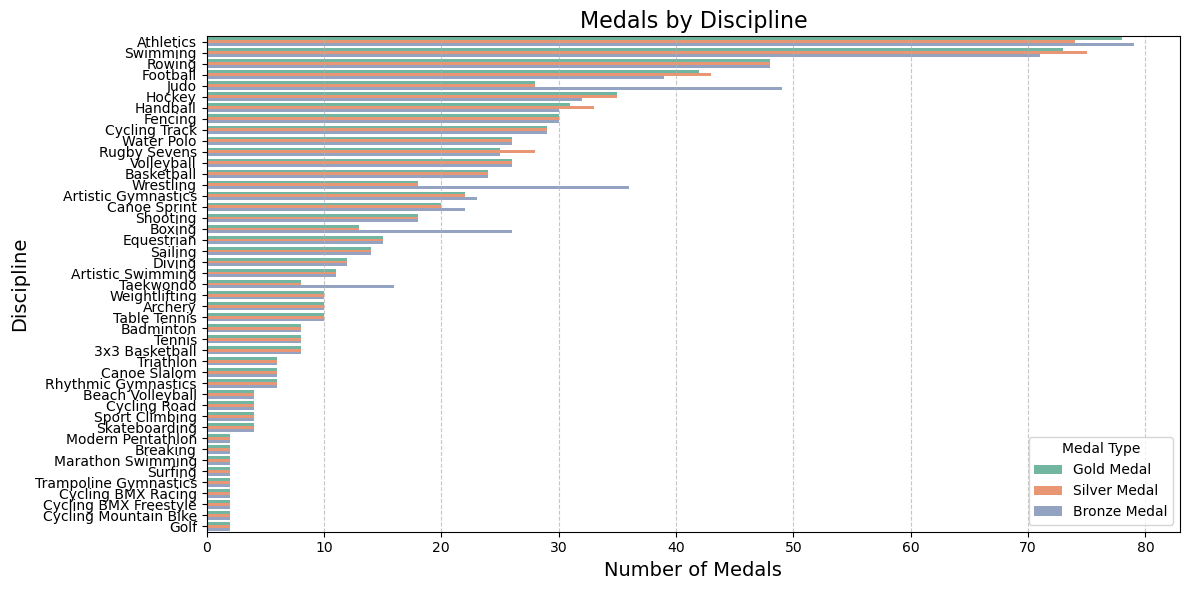

In [655]:
# Bar Plot: Medals by Discipline with Hue for Medal Type
plt.figure(figsize=(12, 6))

# Use countplot with hue to differentiate medal types by discipline
sns.countplot(y='discipline', data=df, palette='Set2', 
              order=df['discipline'].value_counts().index, 
              hue='medal_type')

plt.title('Medals by Discipline', fontsize=16)
plt.xlabel('Number of Medals', fontsize=14)
plt.ylabel('Discipline', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(title='Medal Type')  # Optional: Add a legend title
plt.show()


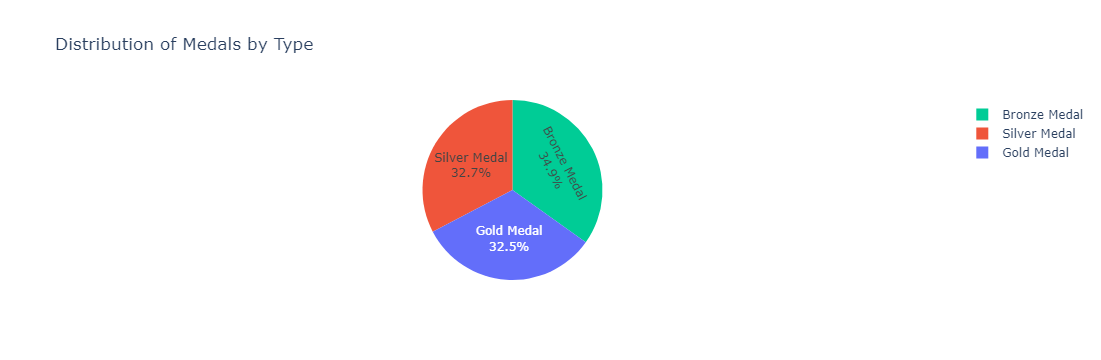

In [656]:
# Pie Chart: Distribution of Medals by Type
pie_chart = px.pie(df, 
                   names='medal_type', 
                   title='Distribution of Medals by Type', 
                   color='medal_type', 
                   color_discrete_sequence=px.colors.qualitative.Plotly)
pie_chart.update_traces(textinfo='percent+label')
pie_chart.show()


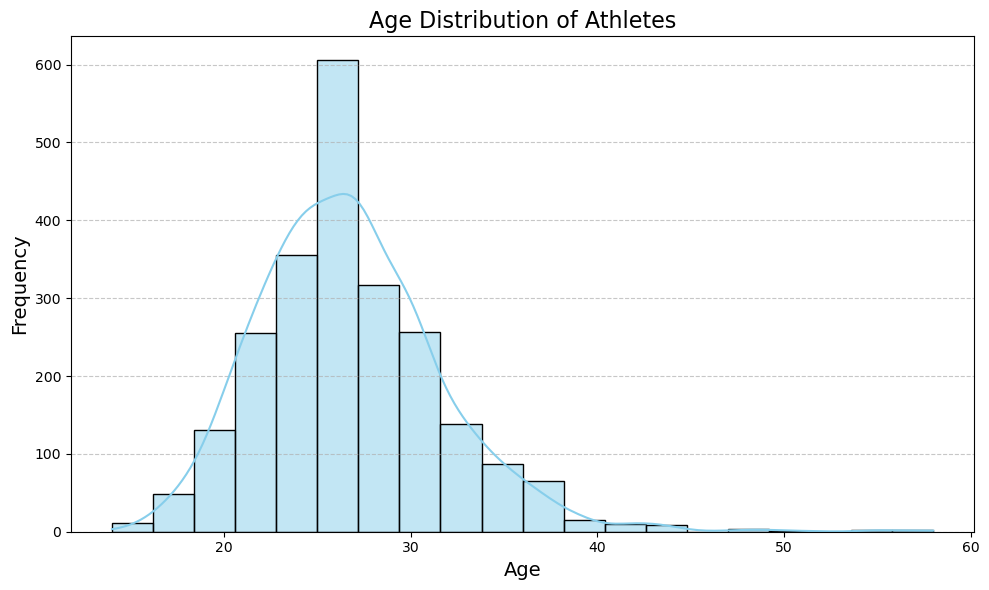

In [657]:
# Calculate age based on 'birth_date'
current_date = datetime.now()
df['birth_date'] = pd.to_datetime(df['birth_date'])  # Ensure 'birth_date' is in datetime format
df['age'] = (current_date - df['birth_date']).dt.days // 365  # Calculate age in years

# Histogram: Age Distribution of Athletes
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Athletes', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


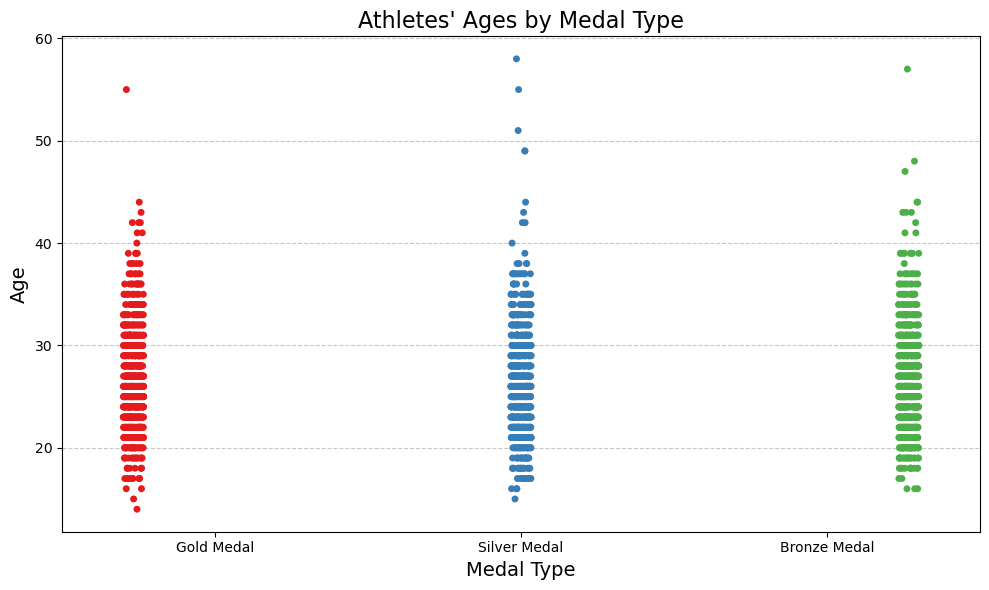

In [659]:
# Strip Plot: Athletes' Ages by Medal Type
plt.figure(figsize=(10, 6))
sns.stripplot(x='medal_type', y='age', data=df, hue='medal_type', palette='Set1', size=5, dodge=True, jitter=True)

plt.title('Athletes\' Ages by Medal Type', fontsize=16)
plt.xlabel('Medal Type', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


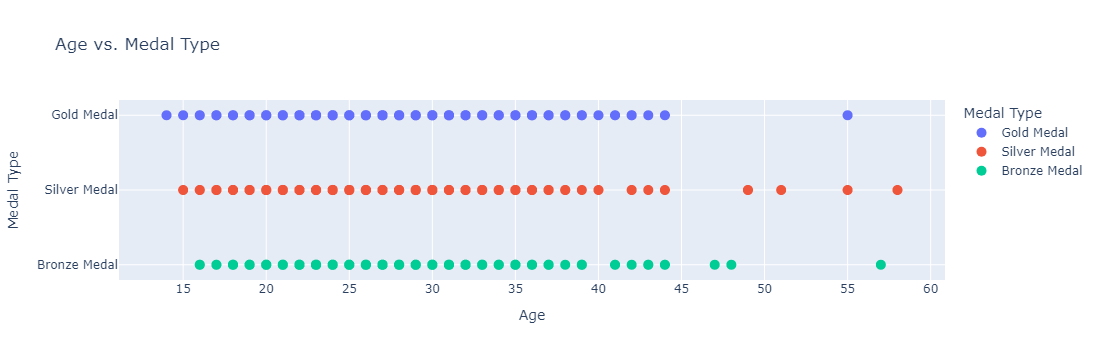

In [660]:
# Scatter Plot: Age vs. Medal Count
scatter_plot = px.scatter(df, 
                           x='age', 
                           y='medal_type', 
                           color='medal_type', 
                           title='Age vs. Medal Type',
                           labels={'age': 'Age', 'medal_type': 'Medal Type'},
                           color_discrete_sequence=px.colors.qualitative.Plotly)
scatter_plot.update_traces(marker=dict(size=10))
scatter_plot.show()


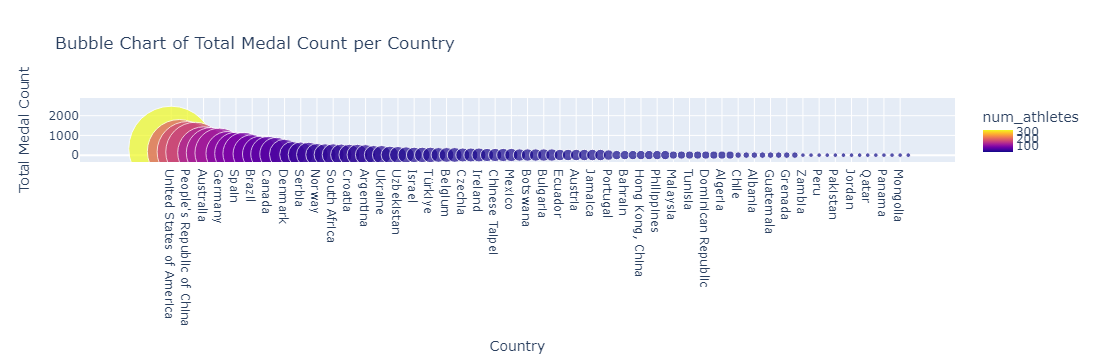

In [661]:
# Bubble Chart: Total Medal Count per Country, Sized by Number of Athletes
# Calculate the total medal count per country
bubble_data = df['country_long'].value_counts().reset_index()
bubble_data.columns = ['country_long', 'medal_count']  # Rename the columns for clarity

# Calculate the number of athletes per country
num_athletes = df['country_long'].value_counts().reset_index()
num_athletes.columns = ['country_long', 'num_athletes']  # Rename columns

# Merge the two DataFrames
bubble_data = bubble_data.merge(num_athletes, on='country_long')

# Create the bubble chart
bubble_chart = px.scatter(bubble_data, 
                          x='country_long',  # Use the correct column name for x-axis
                          y='medal_count', 
                          size='num_athletes',
                          title='Bubble Chart of Total Medal Count per Country',
                          labels={'country_long': 'Country', 'medal_count': 'Total Medal Count'},
                          color='num_athletes',
                          hover_name='country_long',
                          size_max=60)

bubble_chart.show()


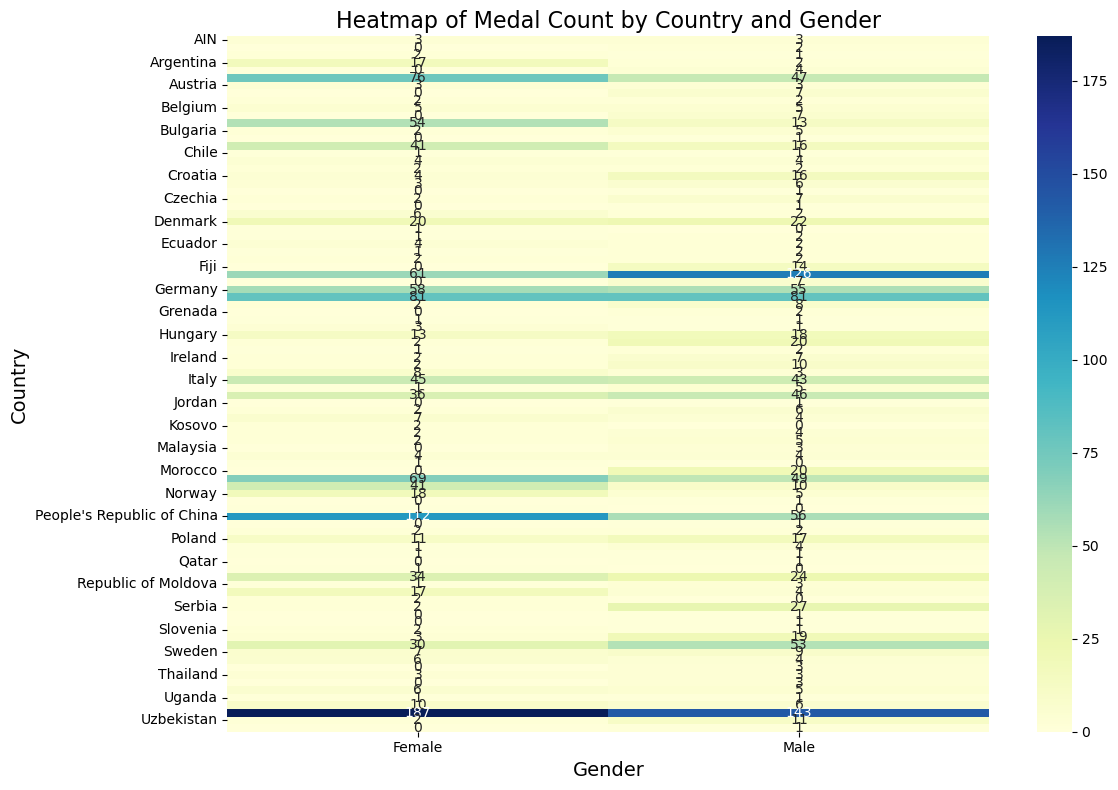

In [662]:
# Heatmap: Medal Count by Country and Gender
heatmap_data = df.groupby(['country_long', 'gender']).size().unstack().fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu', cbar=True)
plt.title('Heatmap of Medal Count by Country and Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.tight_layout()
plt.show()


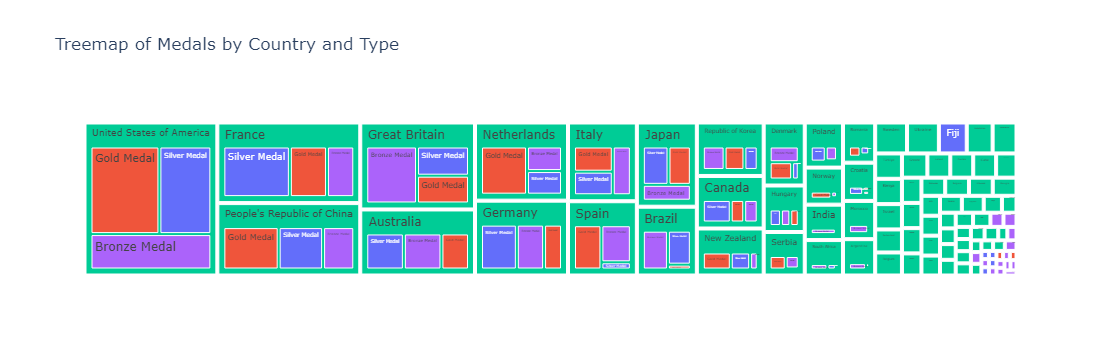

In [663]:
# Treemap: Medals by Country and Type
treemap = px.treemap(df, 
                     path=['country_long', 'medal_type'], 
                     title='Treemap of Medals by Country and Type',
                     labels={'country_long': 'Country', 'medal_type': 'Medal Type'},
                     color='medal_type',
                     color_discrete_sequence=px.colors.qualitative.Plotly)
treemap.show()


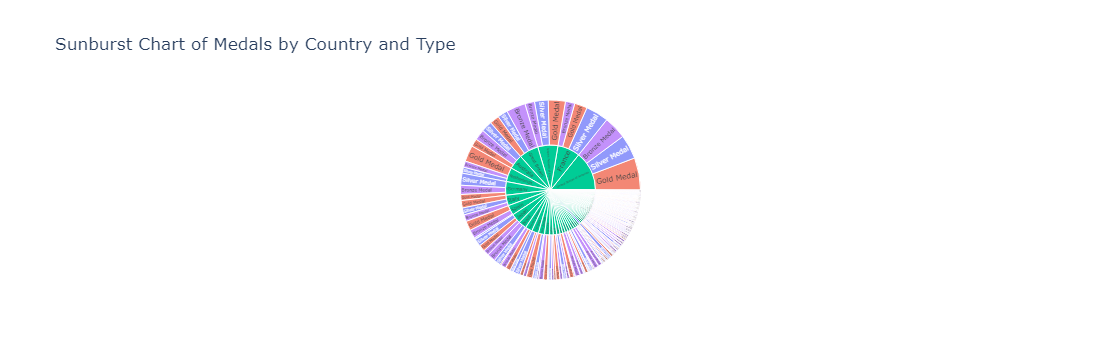

In [664]:
# Sunburst Chart: Medals by Country and Medal Type
sunburst = px.sunburst(df, 
                       path=['country_long', 'medal_type'], 
                       title='Sunburst Chart of Medals by Country and Type',
                       labels={'country_long': 'Country', 'medal_type': 'Medal Type'},
                       color='medal_type',
                       color_discrete_sequence=px.colors.qualitative.Plotly)
sunburst.show()


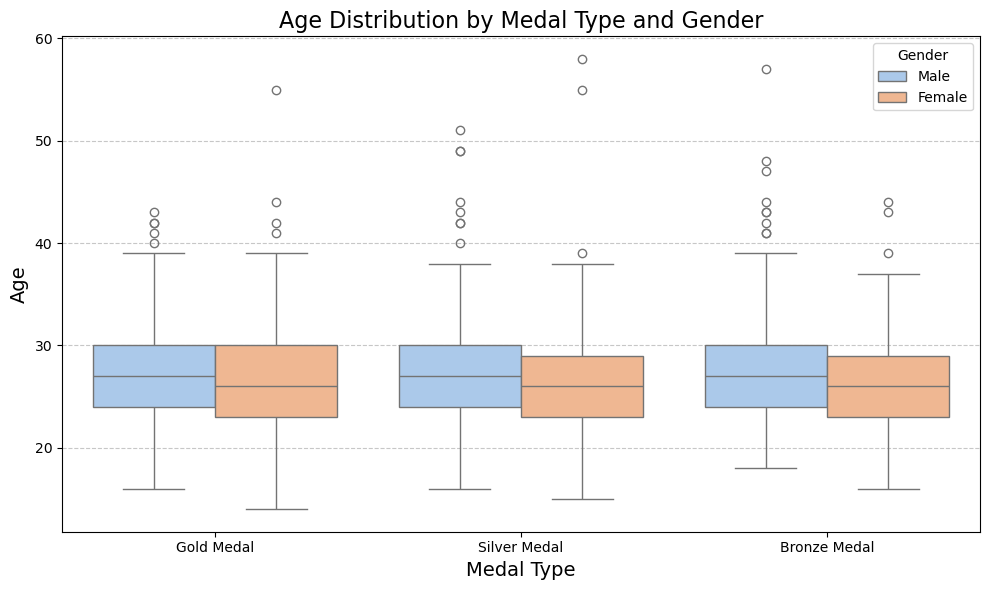

In [665]:
# Box Plot: Age Distribution by Medal Type and Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='medal_type', y='age', data=df, hue='gender', palette='pastel')
plt.title('Age Distribution by Medal Type and Gender', fontsize=16)
plt.xlabel('Medal Type', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Gender')  # Optional: Add a legend title
plt.tight_layout()
plt.show()


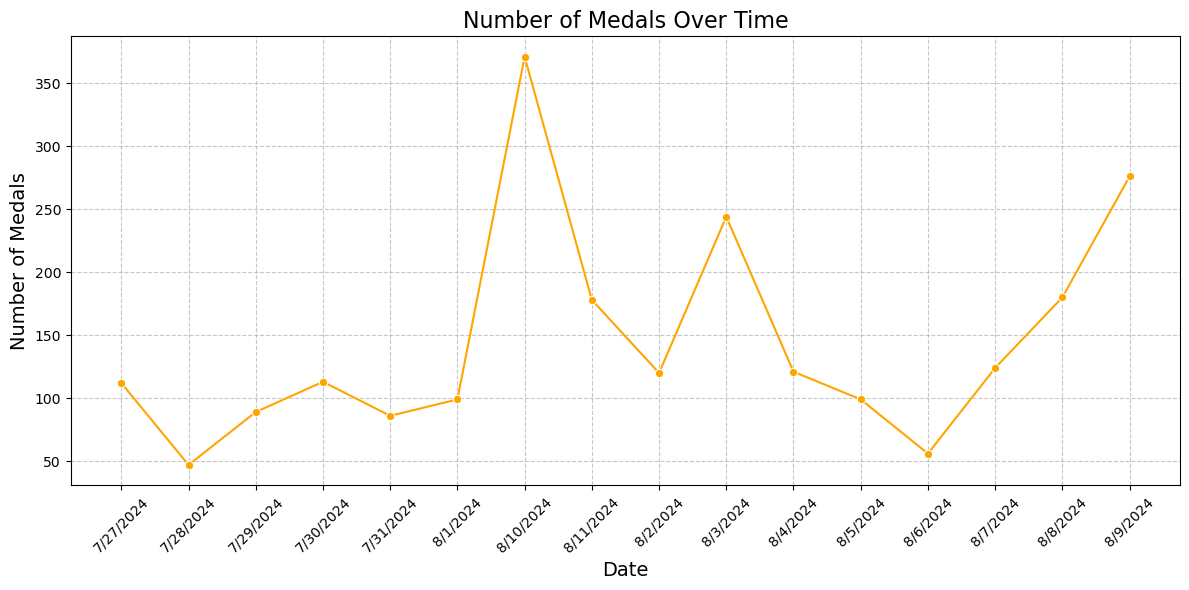

In [666]:
# Line Chart: Number of Medals Over Time
# Assuming 'medal_year' is a column in your dataframe
line_data = df.groupby('medal_date').size().reset_index(name='medal_count')
plt.figure(figsize=(12, 6))
sns.lineplot(data=line_data, x='medal_date', y='medal_count', marker='o', color='orange')
plt.title('Number of Medals Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Medals', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


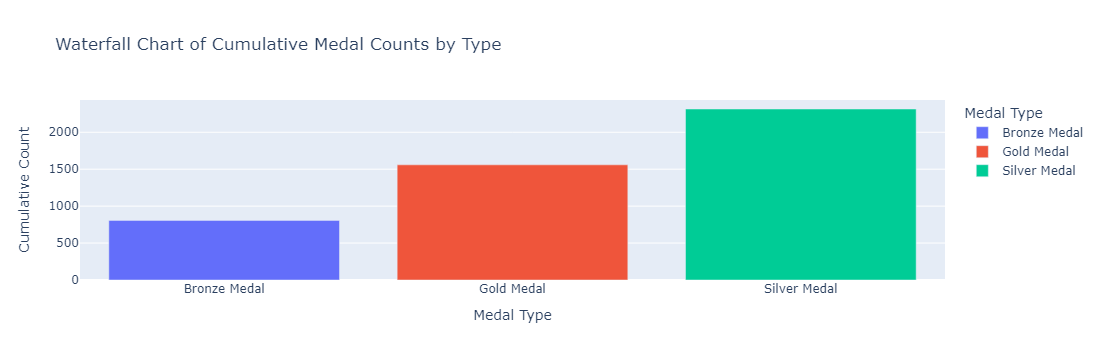

In [667]:
# Waterfall Chart: Cumulative Medal Counts by Type
waterfall_data = df.groupby('medal_type').size().reset_index(name='counts')
waterfall_data['cumulative'] = waterfall_data['counts'].cumsum()
waterfall_chart = px.bar(waterfall_data, 
                          x='medal_type', 
                          y='cumulative', 
                          title='Waterfall Chart of Cumulative Medal Counts by Type',
                          labels={'medal_type': 'Medal Type', 'cumulative': 'Cumulative Count'},
                          color='medal_type')
waterfall_chart.show()


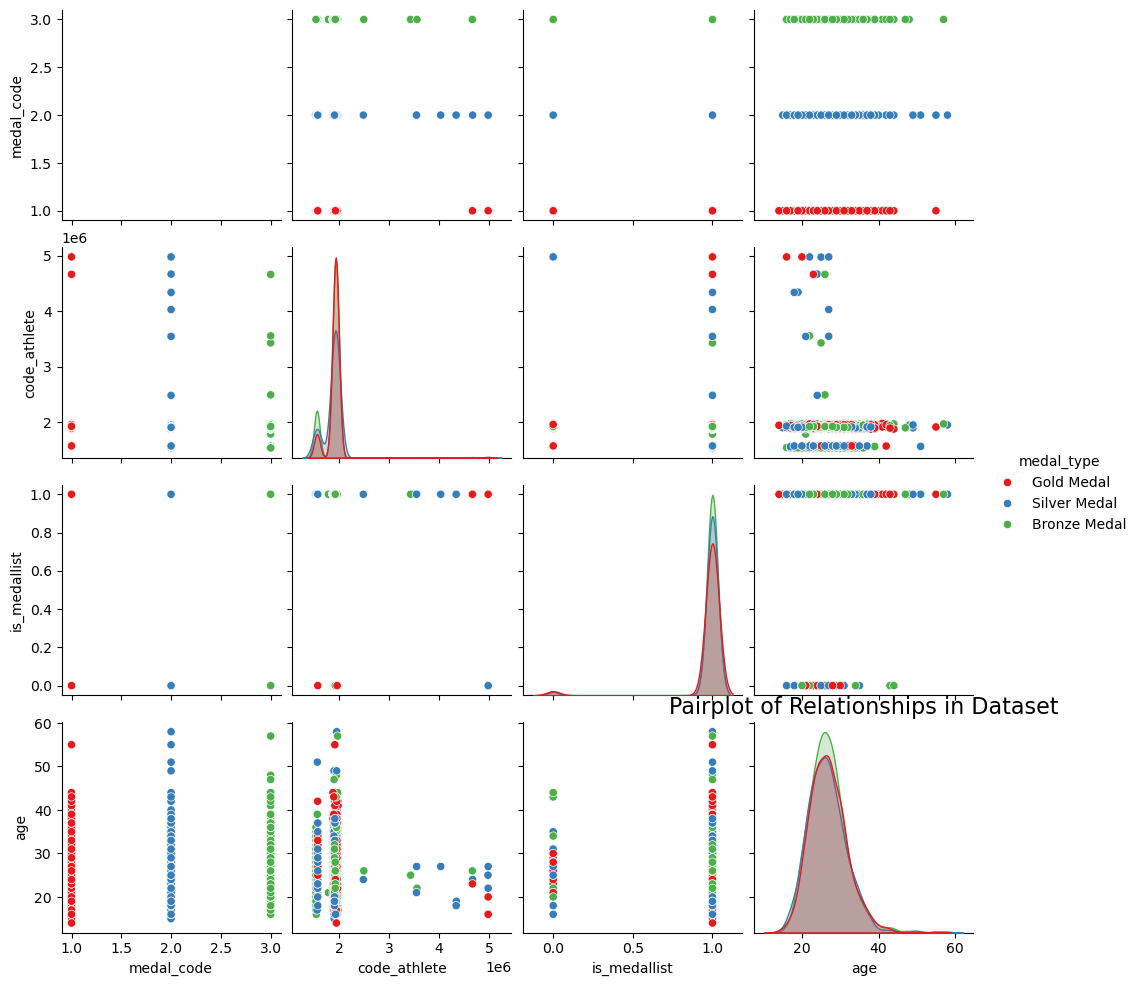

In [668]:
# Pairplot: Pairwise Relationships in the Dataset
sns.pairplot(df, hue='medal_type', palette='Set1')
plt.title('Pairplot of Relationships in Dataset', fontsize=16)
plt.show()


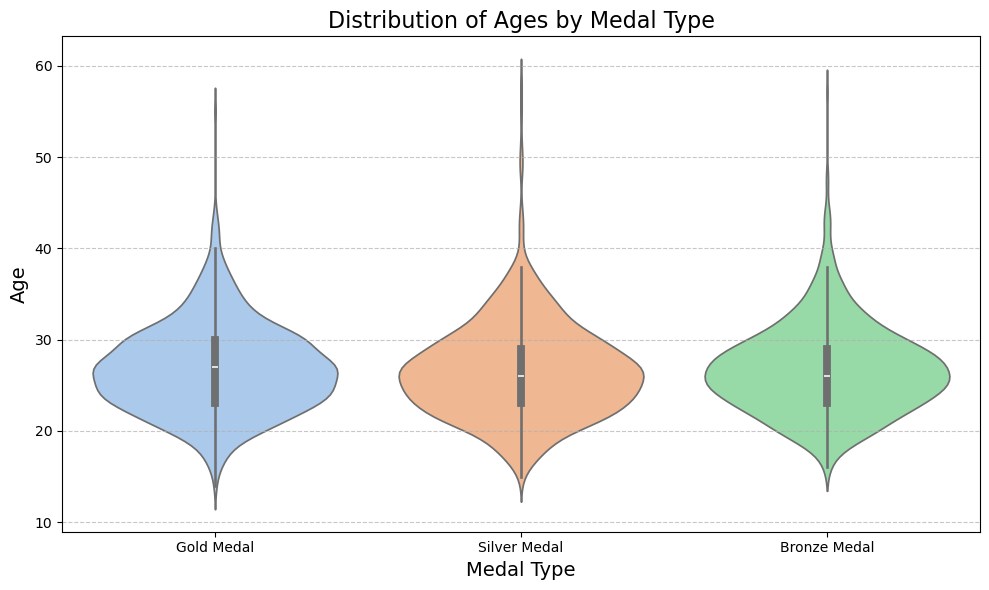

In [669]:
# Violin Plot: Distribution of Ages by Medal Type
plt.figure(figsize=(10, 6))
sns.violinplot(x='medal_type', y='age', data=df, hue='medal_type', palette='pastel', legend=False)
plt.title('Distribution of Ages by Medal Type', fontsize=16)
plt.xlabel('Medal Type', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


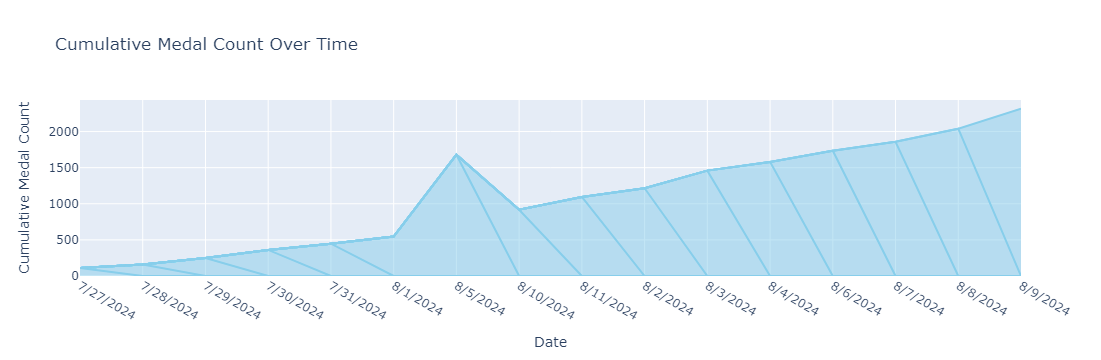

In [670]:
# Area Chart: Cumulative Medal Count Over Time
area_data = df.groupby('medal_date').size().reset_index(name='medal_count')
area_data['cumulative'] = area_data['medal_count'].cumsum()
area_chart = px.area(area_data, 
                      x='medal_date', 
                      y='cumulative', 
                      title='Cumulative Medal Count Over Time',
                      labels={'medal_date': 'Date', 'cumulative': 'Cumulative Medal Count'},
                      line_group='medal_count',
                      color_discrete_sequence=['skyblue'])
area_chart.show()


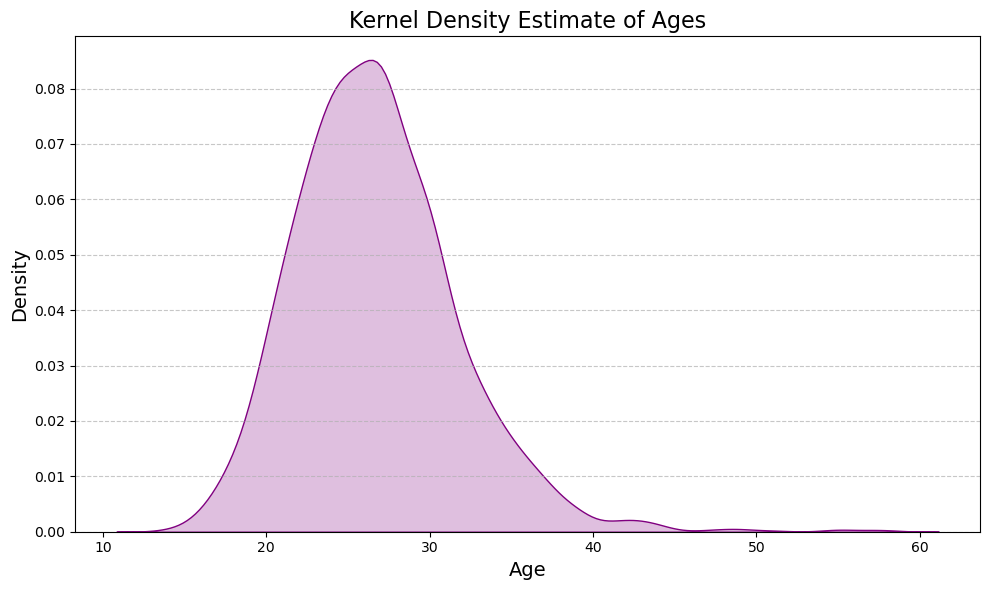

In [671]:
# KDE Plot: Kernel Density Estimate of Ages
plt.figure(figsize=(10, 6))
sns.kdeplot(df['age'], fill=True, color='purple')  # Use fill=True instead of shade=True
plt.title('Kernel Density Estimate of Ages', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


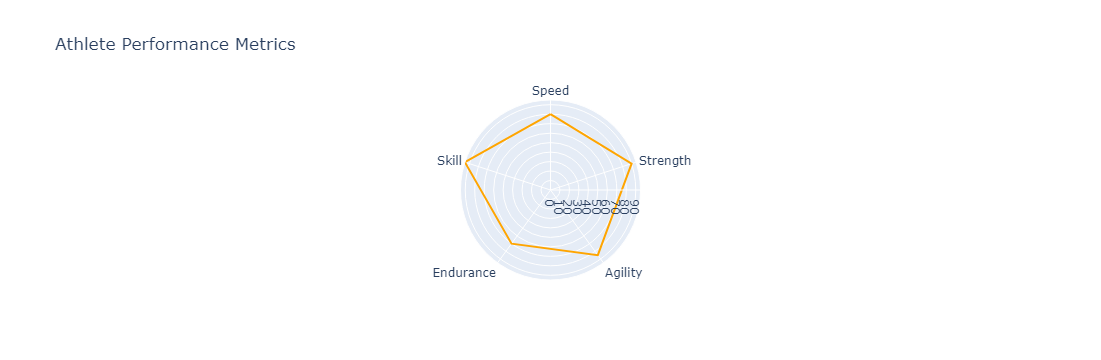

In [672]:
# Radar Chart: Athlete Performance Metrics
# Example data; replace with actual performance metrics
performance_metrics = {
    'Metric': ['Speed', 'Strength', 'Agility', 'Endurance', 'Skill'],
    'Score': [80, 90, 85, 70, 95]
}
radar_df = pd.DataFrame(performance_metrics)
radar_chart = px.line_polar(radar_df, 
                             r='Score', 
                             theta='Metric', 
                             line_close=True, 
                             title='Athlete Performance Metrics',
                             color_discrete_sequence=['orange'])
radar_chart.show()


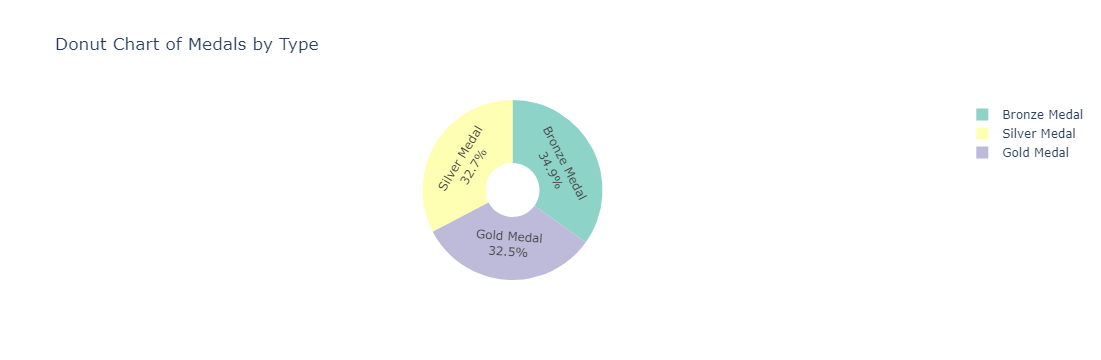

In [673]:
# Donut Chart: Medals by Type
donut_data = df['medal_type'].value_counts().reset_index()
donut_data.columns = ['medal_type', 'count']
donut_chart = px.pie(donut_data, 
                     values='count', 
                     names='medal_type', 
                     title='Donut Chart of Medals by Type', 
                     hole=0.3,
                     color_discrete_sequence=px.colors.qualitative.Set3)
donut_chart.update_traces(textinfo='percent+label')
donut_chart.show()


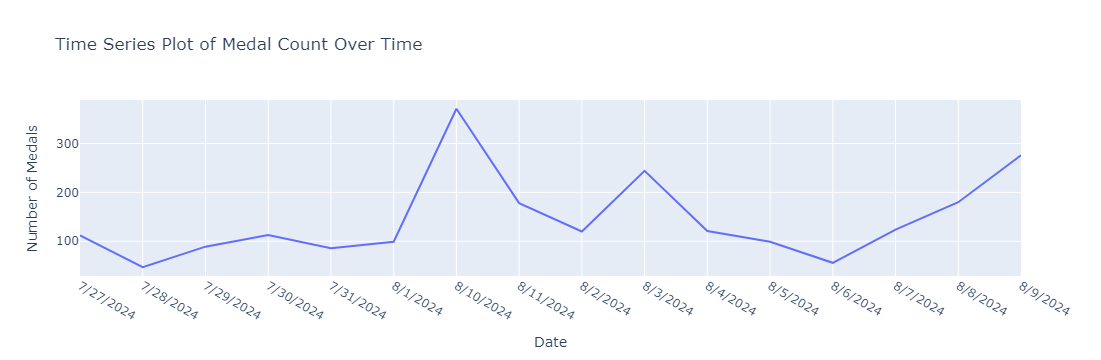

In [674]:
# Time Series Plot: Medal Count Over Time
time_series_data = df.groupby('medal_date').size().reset_index(name='medal_count')
time_series_chart = px.line(time_series_data, 
                             x='medal_date', 
                             y='medal_count', 
                             title='Time Series Plot of Medal Count Over Time',
                             labels={'medal_date': 'Date', 'medal_count': 'Number of Medals'})
time_series_chart.show()


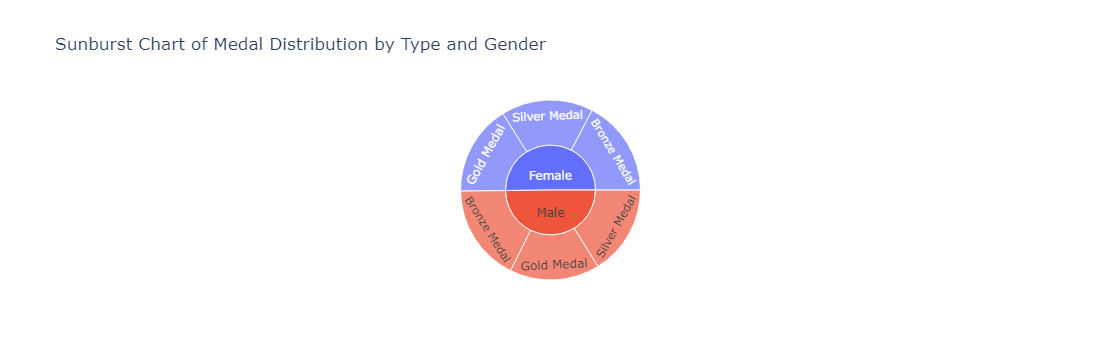

In [675]:
# Sunburst Chart: Medal Distribution by Type and Gender
sunburst_data = df.groupby(['gender', 'medal_type']).size().reset_index(name='count')
sunburst_chart = px.sunburst(sunburst_data, 
                              path=['gender', 'medal_type'], 
                              values='count', 
                              title='Sunburst Chart of Medal Distribution by Type and Gender')
sunburst_chart.show()


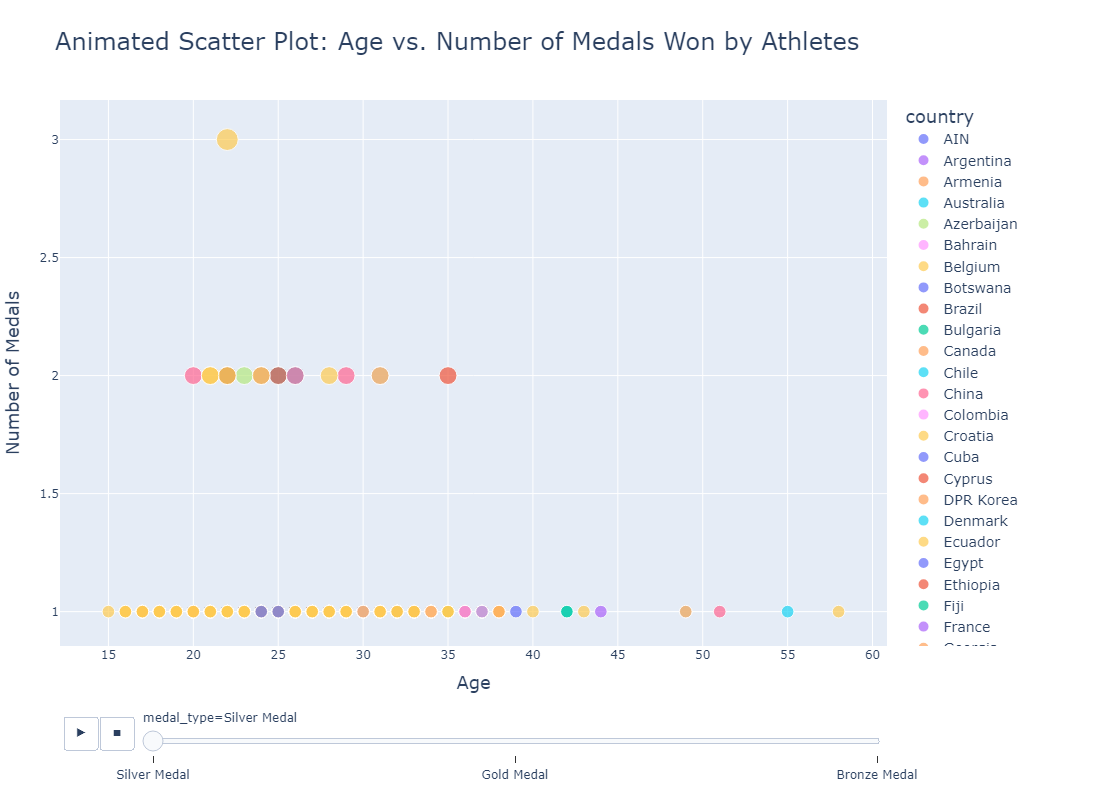

In [676]:
# Check required columns
if 'age' in df.columns and 'country' in df.columns and 'medal_type' in df.columns and 'name' in df.columns:
    # Group data by country, age, and medal type to count medals won
    anim_data = df.groupby(['country', 'age', 'medal_type', 'name']).size().reset_index(name='medal_count')
    
    # Create the animated scatter plot
    fig = px.scatter(
        anim_data, 
        x='age', 
        y='medal_count', 
        animation_frame='medal_type',
        color='country', 
        size='medal_count',  # Size of the markers based on the count of medals
        hover_name='name',   # Show athlete's name on hover
        title='Animated Scatter Plot: Age vs. Number of Medals Won by Athletes',
        labels={'age': 'Age', 'medal_count': 'Number of Medals'},
        color_continuous_scale=px.colors.sequential.Viridis  # Color scale for better visualization
    )

    # Update layout for full-page display
    fig.update_layout(
        height=800,  # Increase height for better visibility
        width=1200,  # Increase width for better visibility
        title_font=dict(size=24),
        xaxis_title_font=dict(size=18),
        yaxis_title_font=dict(size=18),
        legend_title_font=dict(size=18),
        legend_font=dict(size=14),
        margin=dict(l=50, r=50, t=100, b=50)  # Adjust margins for better spacing
    )

    fig.show()
else:
    print("Columns 'age', 'country', 'medal_type', and/or 'name' are not in the dataset.")

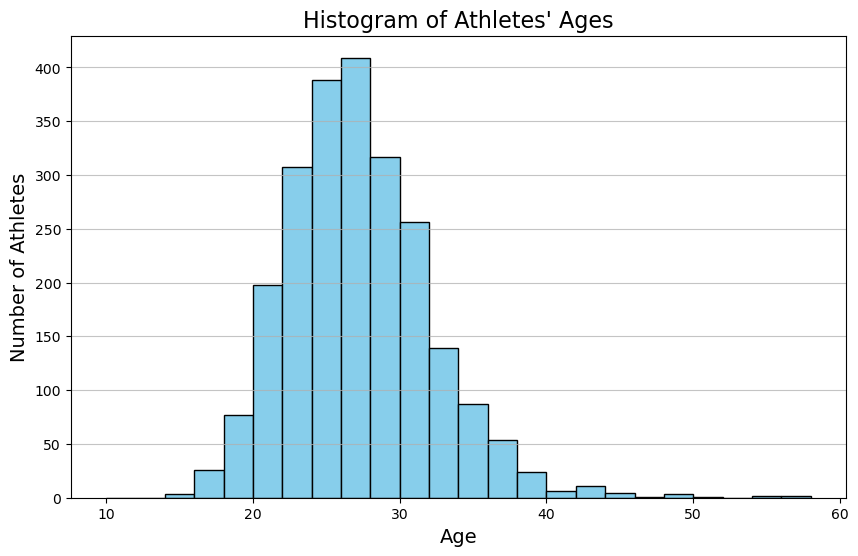

In [677]:
# Histogram: Age Distribution of Athletes
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=np.arange(10, 60, 2), color='skyblue', edgecolor='black')
plt.title('Histogram of Athletes\' Ages', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Athletes', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()


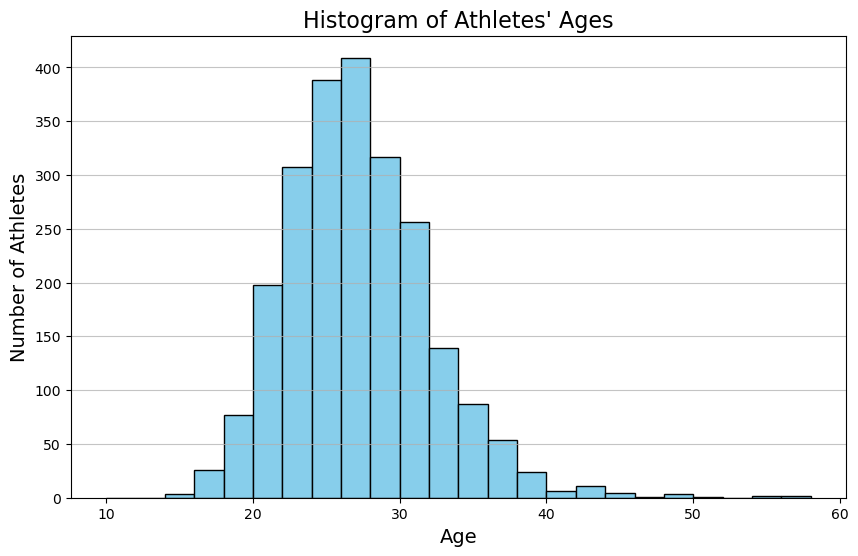

In [678]:
# Histogram: Age Distribution of Athletes
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=np.arange(10, 60, 2), color='skyblue', edgecolor='black')
plt.title('Histogram of Athletes\' Ages', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Athletes', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()


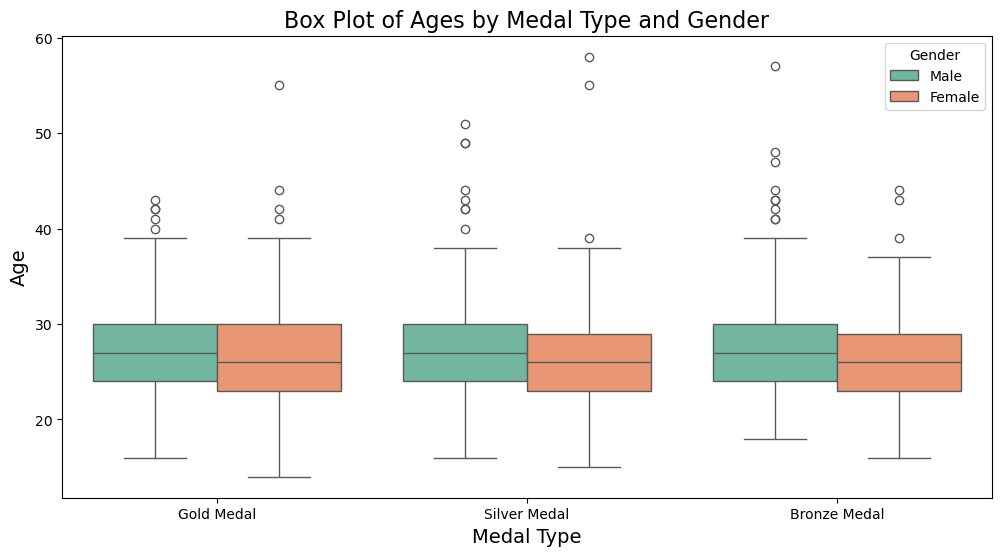

In [679]:
# Box Plot: Ages by Medal Type and Gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='medal_type', y='age', hue='gender', palette='Set2')
plt.title('Box Plot of Ages by Medal Type and Gender', fontsize=16)
plt.xlabel('Medal Type', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.legend(title='Gender')  # Optional: Add a legend title
plt.show()


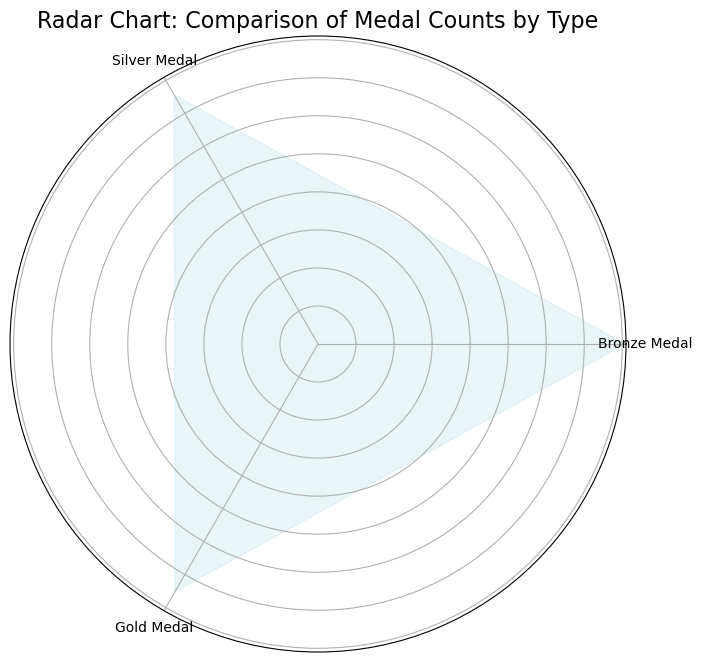

In [680]:
# Radar Chart: Comparison of Medal Counts by Type
medal_counts = df['medal_type'].value_counts()
categories = medal_counts.index
values = medal_counts.values

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
values = np.concatenate((values, [values[0]]))  # Close the circle
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='lightblue', alpha=0.25)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title('Radar Chart: Comparison of Medal Counts by Type', fontsize=16)
plt.show()
